In [53]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import os # accessing directory structure
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting

In [54]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow) -> None:
    nunique = df.nunique()

    # For displaying purposes, pick columns that have between 1 and 50 unique values
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(int(nGraphRow), nGraphPerRow, i + 1)
        # plt.subplot(nGraphRow, nGraphPerRow, i + 1) # this will give valueError as nGraphRow's value is 1.0 not 1
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [55]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth) -> None:
    filename = df.dataframeName
    df = df.dropna() # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [56]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize) -> None:
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna()
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


In [57]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# voice.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('voice.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'voice.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 21 columns


In [58]:
 df1.head(5)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


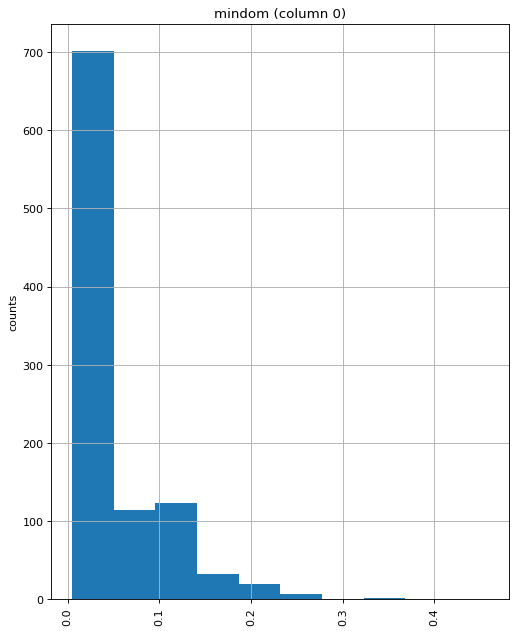

In [59]:
# Distribution graphs (histogram/bar graph) of sampled columns:

plotPerColumnDistribution(df1, 10, 5)

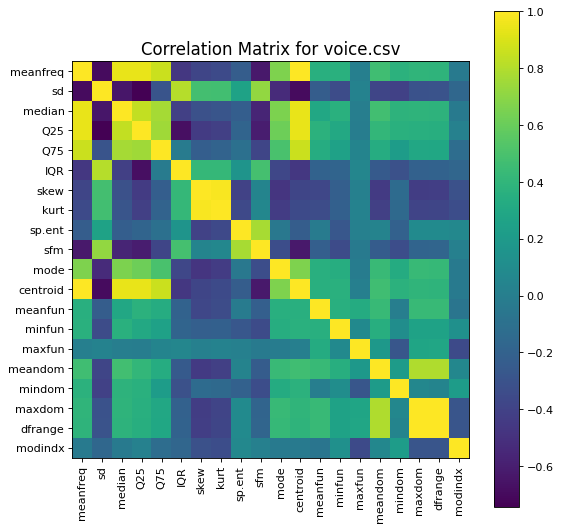

In [60]:
# Correlation matrix
plotCorrelationMatrix(df1, 8)

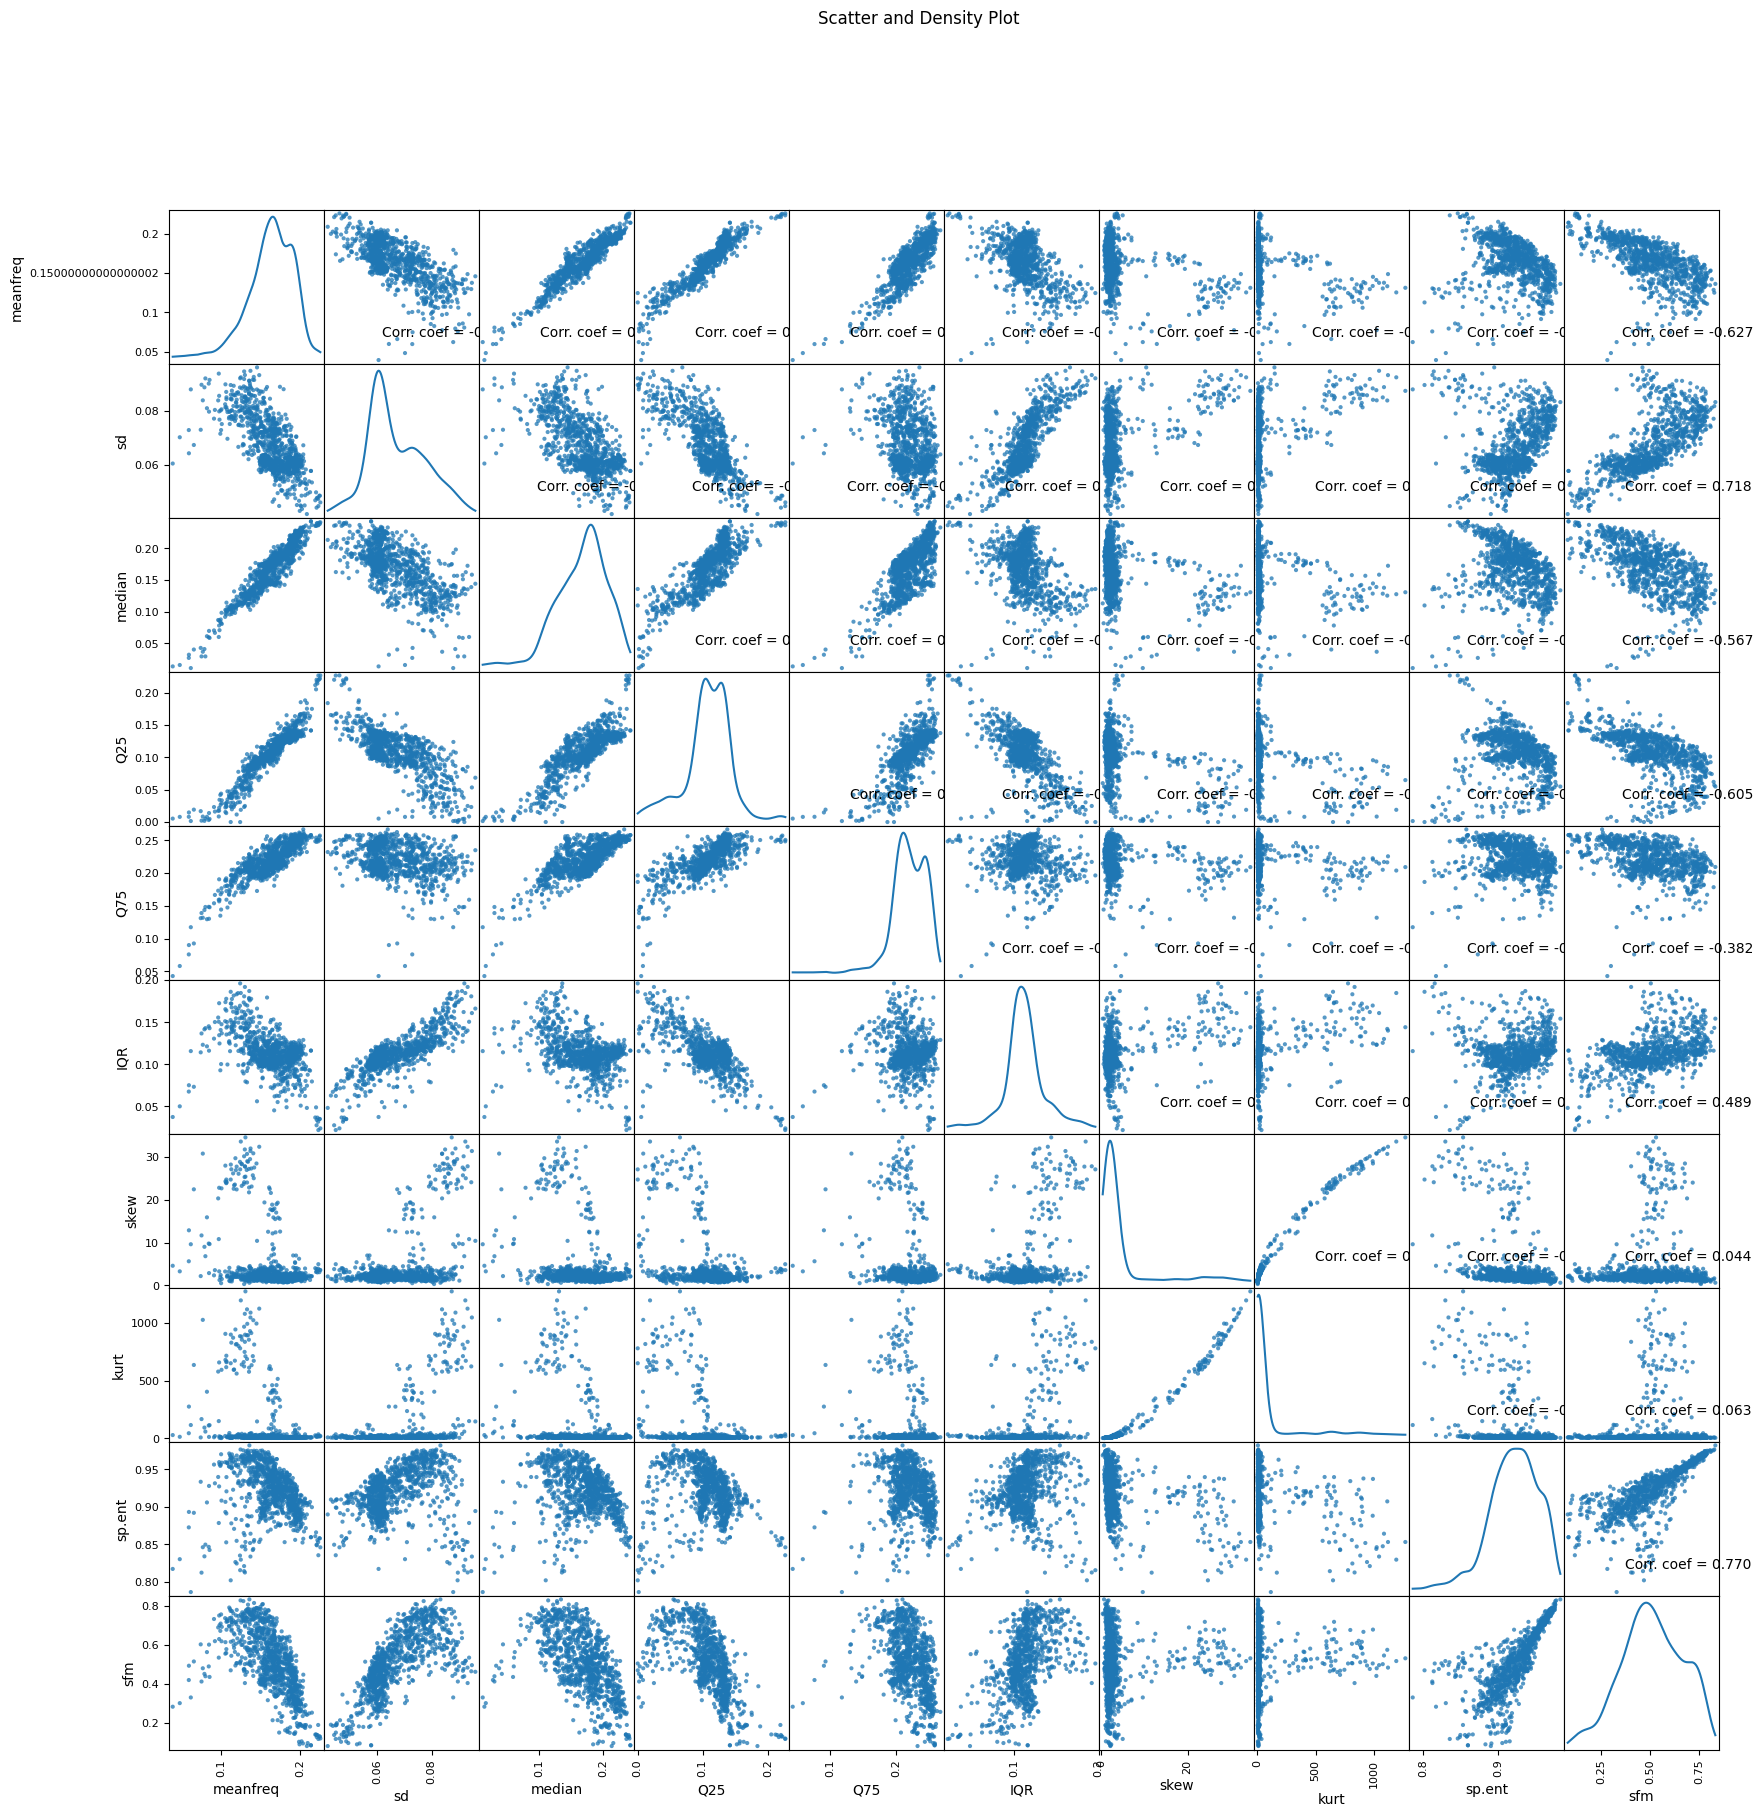

In [61]:
# scatter and density plots
plotScatterMatrix(df1, 20, 10)

## Gender Recognition by voice

In [62]:
import warnings
warnings.filterwarnings('ignore')

# read file
voice = pd.read_csv('voice.csv')
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [63]:
voice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [64]:
voice.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [65]:
# Preprocessing: label encoder and normalization

from sklearn import preprocessing

# label encoding - a way of converting categorical values into numerical ones, 
# so that they can be used by ML models that only accept numerical inputs

# LabelEncoder - The code is performing a task called label encoding, which is a way of converting categorical values 
# into numerical ones, so that they can be used by machine learning models that only accept numerical inputs
le = preprocessing.LabelEncoder()

voice['label'] = le.fit_transform(voice['label'])
le.classes_

array(['female', 'male'], dtype=object)

In [66]:
voice[:] = preprocessing.MinMaxScaler().fit_transform(voice)
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.096419,0.473409,0.084125,0.060063,0.204956,0.254828,0.367853,0.208279,0.635798,0.564526,...,0.096419,0.157706,0.030501,0.981526,0.000000,0.006452,0.000000,0.000000,0.000000,1
1,0.125828,0.505075,0.116900,0.077635,0.215683,0.246961,0.644279,0.483766,0.630964,0.591578,...,0.125828,0.287642,0.031140,0.834600,0.000407,0.006452,0.002144,0.002146,0.056449,1
2,0.179222,0.675536,0.102873,0.034284,0.385912,0.457148,0.885255,0.782275,0.442738,0.548382,...,0.179222,0.236945,0.030264,0.954963,0.000060,0.006452,0.000357,0.000358,0.049885,1
3,0.528261,0.554611,0.587559,0.389906,0.715802,0.407358,0.031549,0.001613,0.923261,0.856457,...,0.528261,0.183442,0.041287,0.834600,0.065659,0.006452,0.025375,0.025393,0.265043,1
4,0.452195,0.627209,0.454272,0.317627,0.707515,0.474474,0.027742,0.001732,0.958736,0.926348,...,0.452195,0.279190,0.036829,0.929285,0.238994,0.006452,0.250536,0.250715,0.223380,1


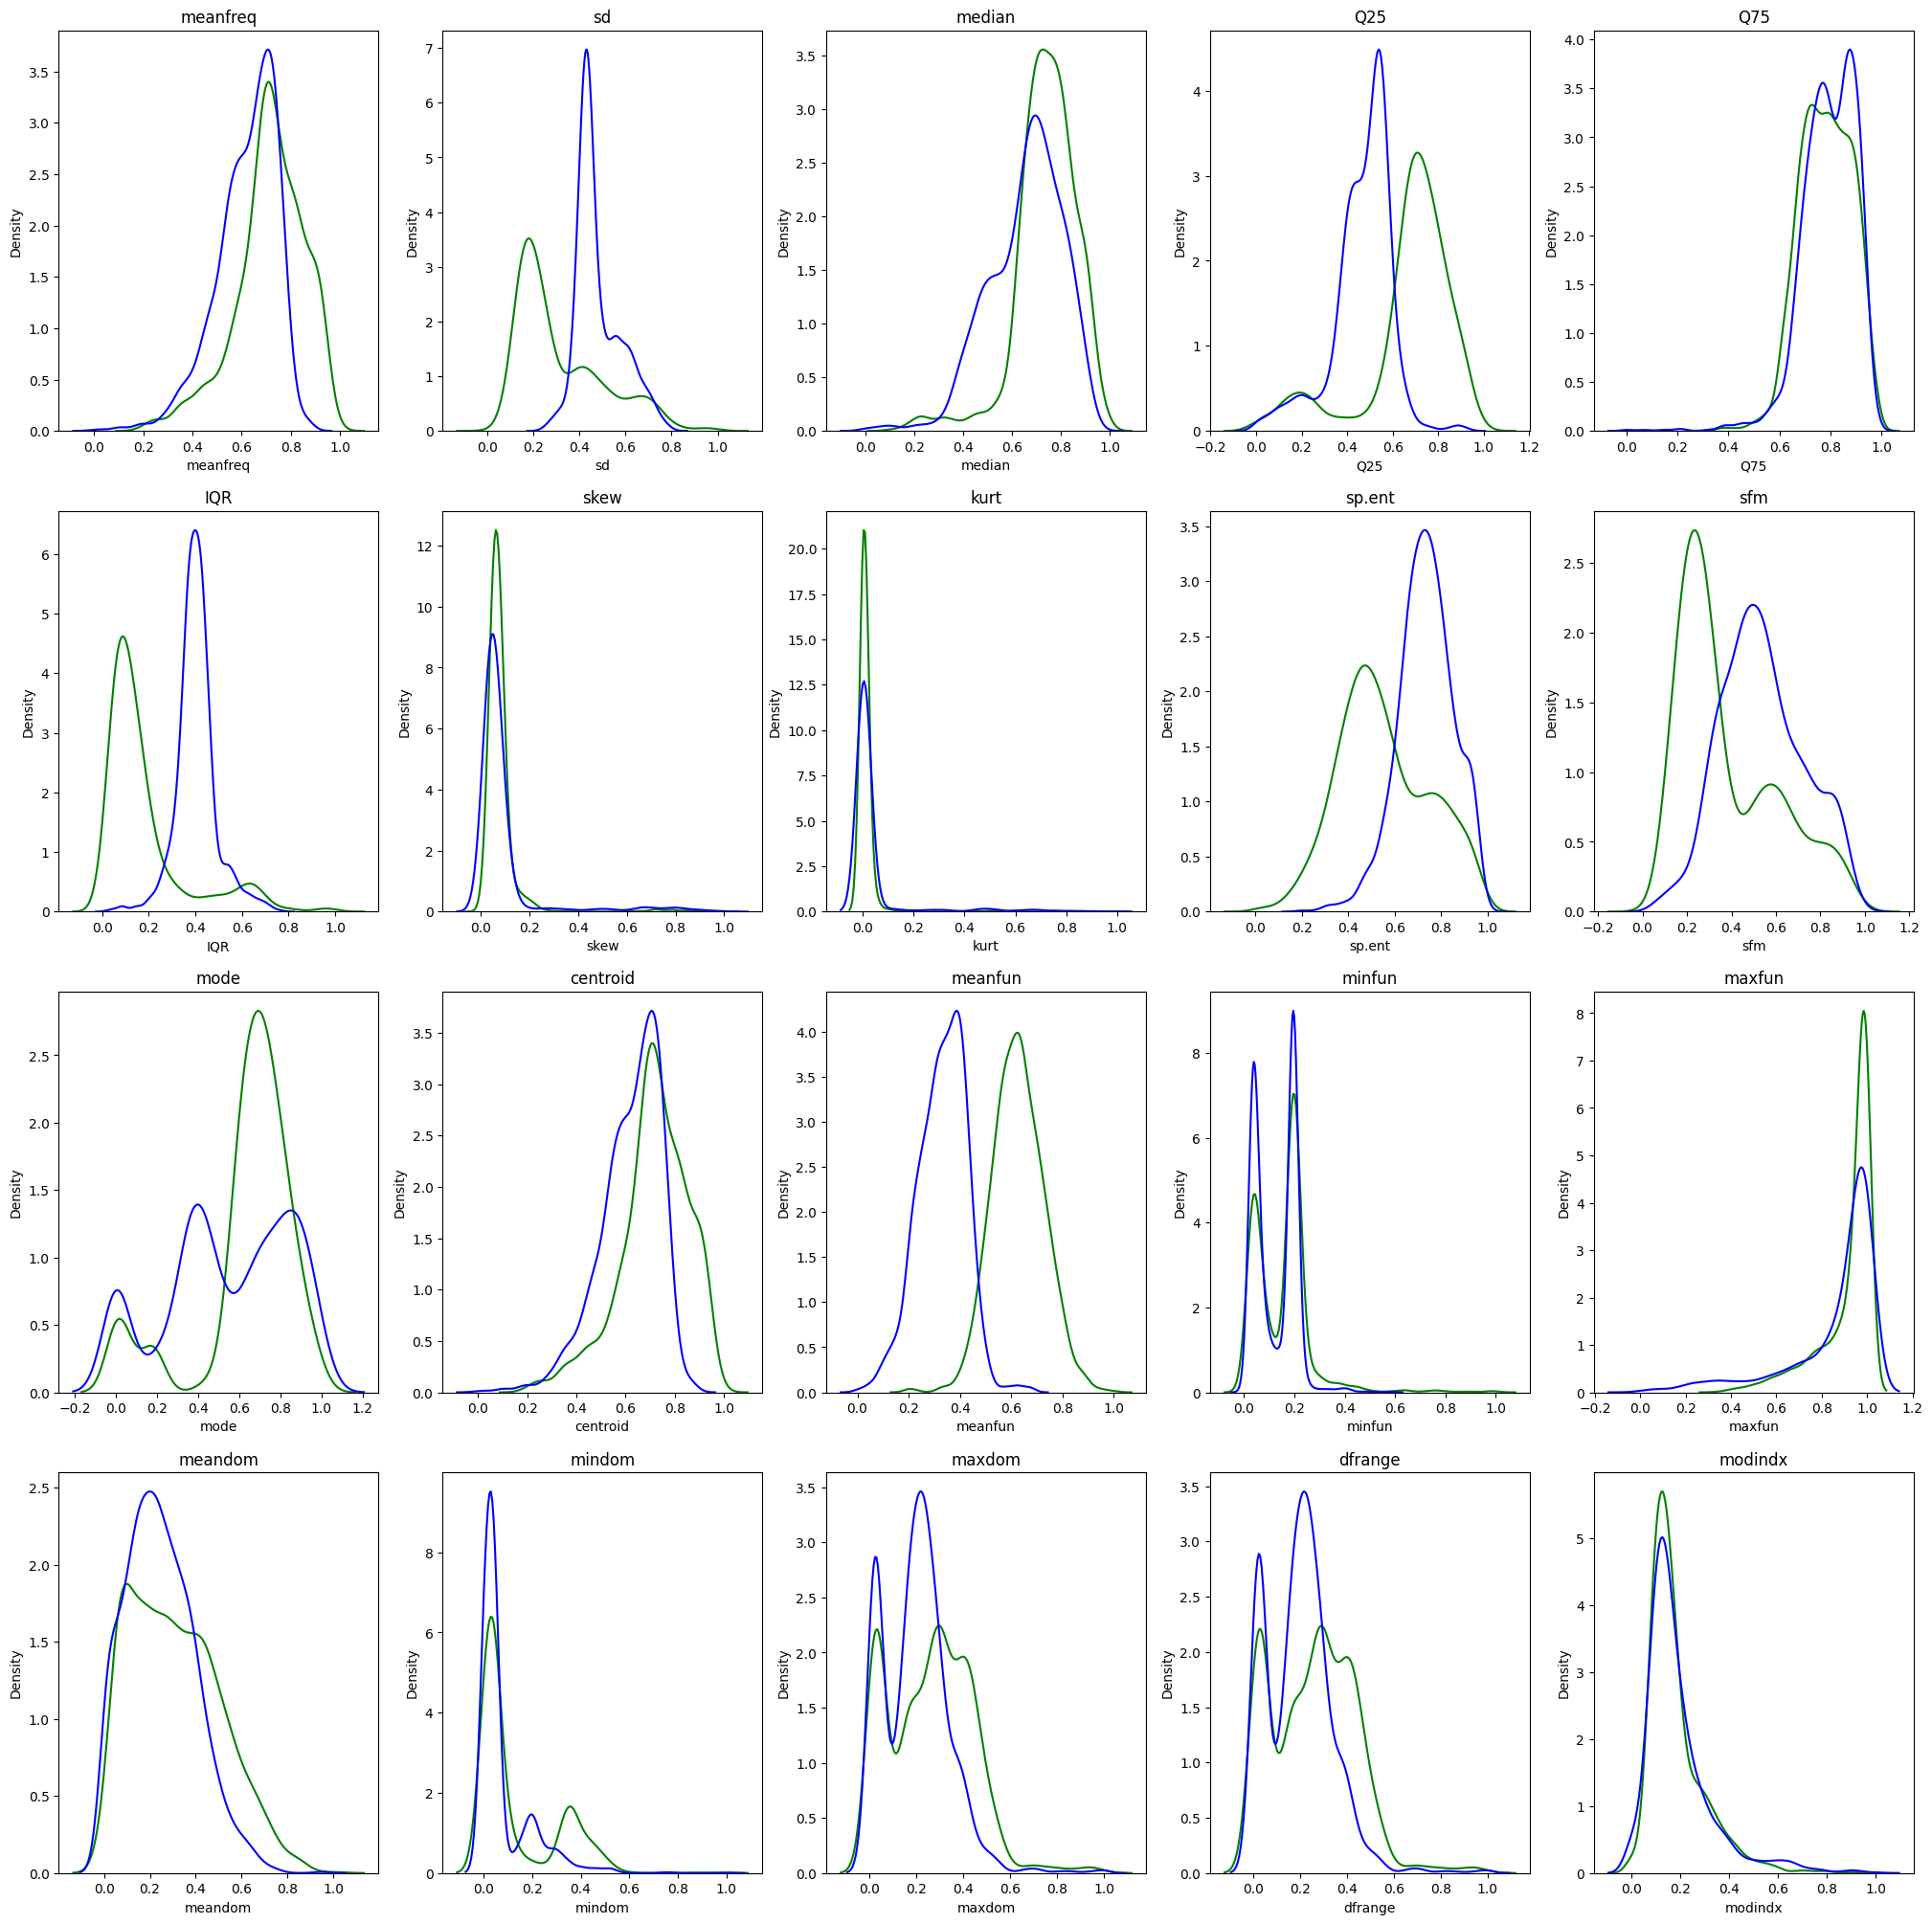

In [67]:
# visualization

import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(4, 5, figsize=(25, 25))
for i in range(1, 21):
    plt.subplot(4, 5, i)
    plt.title(voice.columns[i - 1])
    sns.kdeplot(voice.loc[voice['label'] == 0, voice.columns[i - 1]], color='green', label='F')
    sns.kdeplot(voice.loc[voice['label'] == 1, voice.columns[i - 1]], color='blue', label='M')


###### At first glance, most significant features are Q25, IQR and meanfun. We will build models by using the 20 features and the 3 distinct features.

###### Using K-Nearest Neighbors, Naive Bayes, Support Vector Machine to build models

In [68]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
from sklearn import neural_network

In [69]:
# split the data
train, test = train_test_split(voice, test_size=0.3)
train.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
2212,0.777711,0.324981,0.782644,0.679844,0.888372,0.273274,0.041931,0.002808,0.613440,0.360563,...,0.777711,0.571086,0.209726,0.990585,0.239215,0.040860,0.180843,0.180258,0.087462,0
3154,0.759035,0.280362,0.770517,0.713635,0.820683,0.172485,0.029449,0.001274,0.743619,0.397325,...,0.759035,0.620447,0.275163,0.904450,0.241006,0.316129,0.319871,0.313662,0.098896,0
2394,0.809337,0.143513,0.794482,0.801241,0.800811,0.062120,0.073825,0.006372,0.349362,0.203603,...,0.809337,0.638083,0.199472,0.999749,0.463204,0.040860,0.265547,0.265021,0.116253,0
2200,0.814783,0.434098,0.855865,0.717458,0.953198,0.297041,0.097368,0.012180,0.638490,0.451736,...,0.814783,0.548610,0.195495,0.999749,0.639419,0.144086,0.503574,0.501073,0.117129,0
311,0.782568,0.398110,0.777938,0.644290,0.939019,0.359366,0.071097,0.007784,0.614336,0.176043,...,0.782568,0.334152,0.042110,0.929285,0.118473,0.006452,0.163688,0.163805,0.115151,1


In [70]:
x_train = train.iloc[:, :-1]
x_test = test.iloc[:, :-1]

y_train = train['label']
y_test = test['label']

In [71]:
x_train3 = train[["meanfun","IQR","Q25"]]
x_test3 = test[["meanfun","IQR","Q25"]]

y_train3 = train["label"]
y_test3 = test["label"]

In [72]:
def classify(model,x_train,y_train,x_test,y_test) -> None:
    from sklearn.metrics import classification_report
    target_names = ['female', 'male']
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(classification_report(y_test, y_pred, target_names=target_names, digits=4))

### K-Nearest Neighbors
###### Using neighbors.KNeighborsClassifier() to build the model.

In [73]:
# The function knn_error is a custom function that takes five parameters: k, x_train, y_train, x_test, and y_test. 
# The function returns the optimal value of k for the k-nearest neighbors (kNN) algorithm, 
# based on the lowest error rate on the test set.
def knn_error(k,x_train,y_train,x_test,y_test) -> range:
    error_rate = [] # store the error rates for different values of k
    K=range(1,k) # range of values from 1 to k (exclusive) and assigns it to K
    
    for i in K:
        knn = neighbors.KNeighborsClassifier(n_neighbors = i) # sets the n_neighbors parameter to k
        knn.fit(x_train, y_train) # Fit the k-nearest neighbors classifier from the training dataset.
        y_pred = knn.predict(x_test) # predicts the labels for the test data
        error_rate.append(np.mean(y_pred != y_test)) # calculates the mean error rate by comparing y_pred and y_test 
    
    kloc = error_rate.index(min(error_rate)) # finds the index of the minimum value in the error_rate list
    print("Lowest error is %s occurs at k=%s." % (error_rate[kloc], K[kloc]))

    plt.plot(K, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    plt.show()
    return K[kloc] # returns the optimal value of k by indexing the K range with kloc

Lowest error is 0.024185068349106203 occurs at k=9.


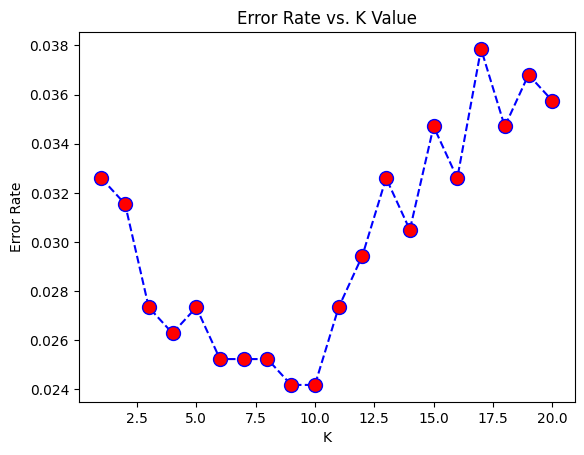

In [81]:
k=knn_error(21,x_train,y_train,x_test,y_test)

In [75]:
model = neighbors.KNeighborsClassifier(n_neighbors = k)
classify(model,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9853    0.9670    0.9761       485
        male     0.9663    0.9850    0.9756       466

    accuracy                         0.9758       951
   macro avg     0.9758    0.9760    0.9758       951
weighted avg     0.9760    0.9758    0.9758       951



Lowest error is 0.024185068349106203 occurs at k=4.


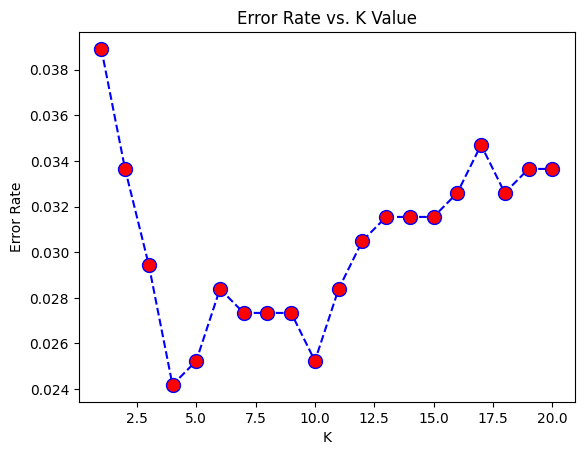

In [76]:
k=knn_error(21,x_train3,y_train3,x_test3,y_test3)

In [77]:
model = neighbors.KNeighborsClassifier(n_neighbors = k)
classify(model,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9752    0.9732    0.9742       485
        male     0.9722    0.9742    0.9732       466

    accuracy                         0.9737       951
   macro avg     0.9737    0.9737    0.9737       951
weighted avg     0.9737    0.9737    0.9737       951

